# ## 1. Introduction
Global pollution has become a major environmental concern. This project analyzes pollution data across countries and years to understand trends and predict energy recovery from pollution using machine learning models.


In [49]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)


# ## 2. Dataset Description
The dataset contains global pollution indicators such as air, water, and soil pollution indices, CO₂ emissions, industrial waste, population, and energy recovery data across multiple countries and years.


In [50]:
# Load Dataset
df = pd.read_csv("../data/Global_Pollution_Analysis.csv")
df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions,Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [51]:
# Check basic info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions                           200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions,Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [52]:
# Check Missing Values
df.isnull().sum()


Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions                             0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [53]:
# Handle Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)


In [54]:
# Encode Categorical Variables
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])


In [55]:

# Rename Columns
print(df.columns)


Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions', 'Renewable_Energy (%)',
       'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')


In [56]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)


In [57]:

print(list(df.columns))


['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste_in_tons', 'Energy_Recovered_in_GWh', 'CO2_Emissions', 'Renewable_Energy_%', 'Plastic_Waste_Produced_in_tons', 'Energy_Consumption_Per_Capita_in_MWh', 'Population_in_millions', 'GDP_Per_Capita_in_USD']


In [58]:

# Feature Scaling 
scaler = StandardScaler()

scale_cols = ['Air_Pollution_Index', 'CO2_Emissions', 'Industrial_Waste_in_tons']
df[scale_cols] = scaler.fit_transform(df[scale_cols])


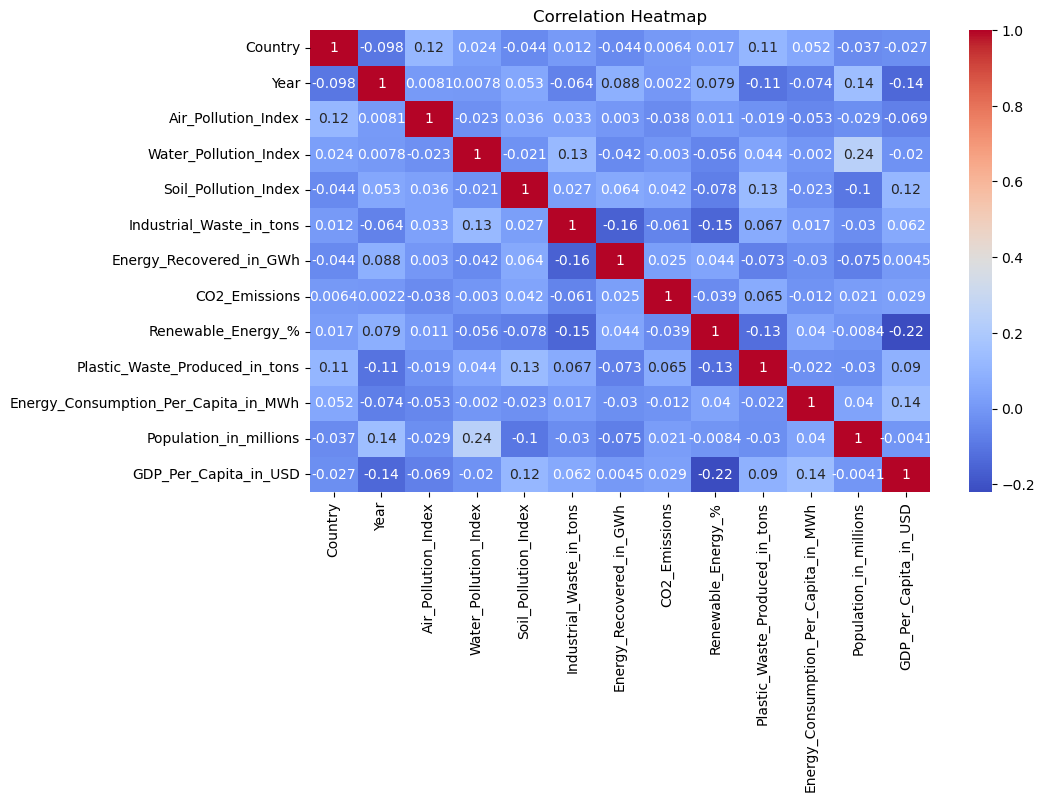

In [59]:
# Visualize Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


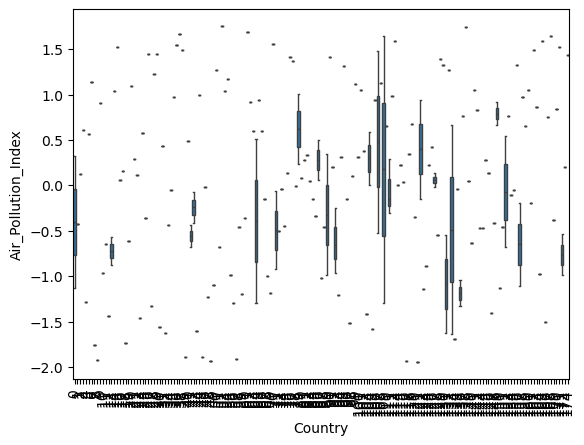

In [60]:
# Boxplot of Air Pollution Index by Country
sns.boxplot(x='Country', y='Air_Pollution_Index', data=df)
plt.xticks(rotation=90)
plt.show()



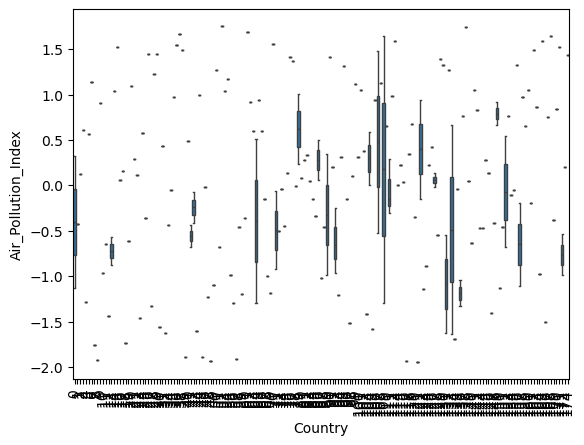

In [61]:

# Boxplot of Air Pollution Index by Country 
sns.boxplot(x='Country', y='Air_Pollution_Index', data=df)
plt.xticks(rotation=90)
plt.show()



In [62]:
# Rename specific columns for clarity
df.rename(columns={
    'Energy_Consumption_Per_Capita_in_MWh': 'Energy_per_Capita'
}, inplace=True)


In [63]:
# Display the updated column
df[['Energy_per_Capita']].head()


,Energy_per_Capita
0,12.56
1,5.23
2,13.15
3,0.78
4,12.84


In [64]:
# Define Features and Target Variable
X = df[
    [
        'Air_Pollution_Index',
        'CO2_Emissions',
        'Industrial_Waste_in_tons',
        'Energy_per_Capita'
    ]
]

y = df['Energy_Recovered_in_GWh']



In [65]:
# Split the Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [66]:

# Train Linear Regression Model 
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
# Make Predictions
y_pred = lr_model.predict(X_test)


In [68]:
# Evaluate Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 25154.883600502468
Mean Absolute Error (MAE): 142.62177495283328
R² Score: -0.04022154961355273


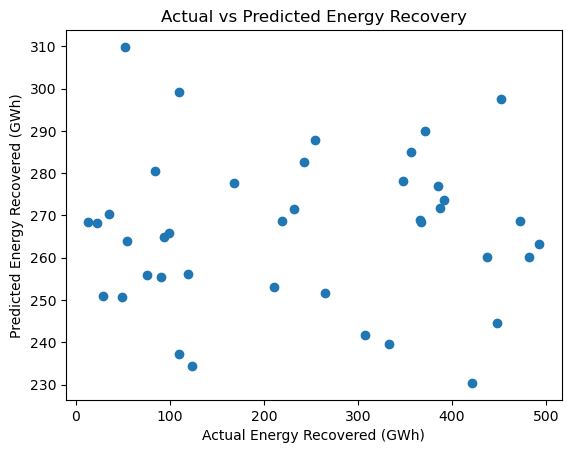

In [69]:
# Plot Actual vs Predicted Values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Recovered (GWh)")
plt.ylabel("Predicted Energy Recovered (GWh)")
plt.title("Actual vs Predicted Energy Recovery")
plt.show()


In [70]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

feature_importance.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
3,Energy_per_Capita,-1.595284
1,CO2_Emissions,-4.199048
0,Air_Pollution_Index,-9.102823
2,Industrial_Waste_in_tons,-18.517325


In [71]:
# Create Pollution Level Categories
def pollution_category(value):
    if value < -0.5:
        return 0   # Low
    elif value < 0.5:
        return 1   # Medium
    else:
        return 2   # High

df['Pollution_Level'] = df['Air_Pollution_Index'].apply(pollution_category)


In [72]:
# Prepare Data for Classification
X_cls = df[['Air_Pollution_Index', 'CO2_Emissions']]
y_cls = df['Pollution_Level']


In [73]:
# Split the Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls,
    test_size=0.2,
    random_state=42
)


In [74]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(multi_class='auto', max_iter=1000)
log_model.fit(X_train, y_train)


c:\Users\Mogili.Karthik\miniconda3\envs\JupyterProject2\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'auto'


In [75]:
# Make Predictions
y_pred = log_model.predict(X_test)


In [76]:
# Evaluate Classification Model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         9

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



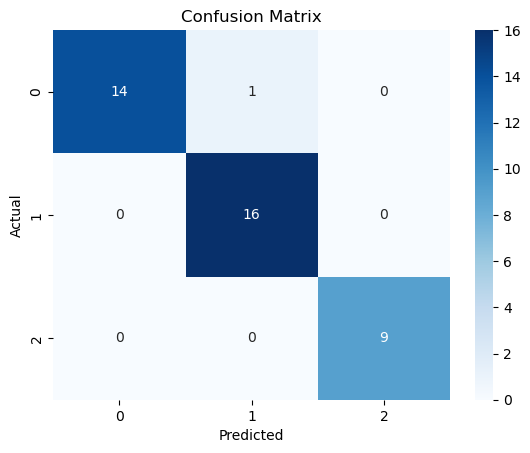

In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
